Cambios en con crecimiento exponencial y logistico

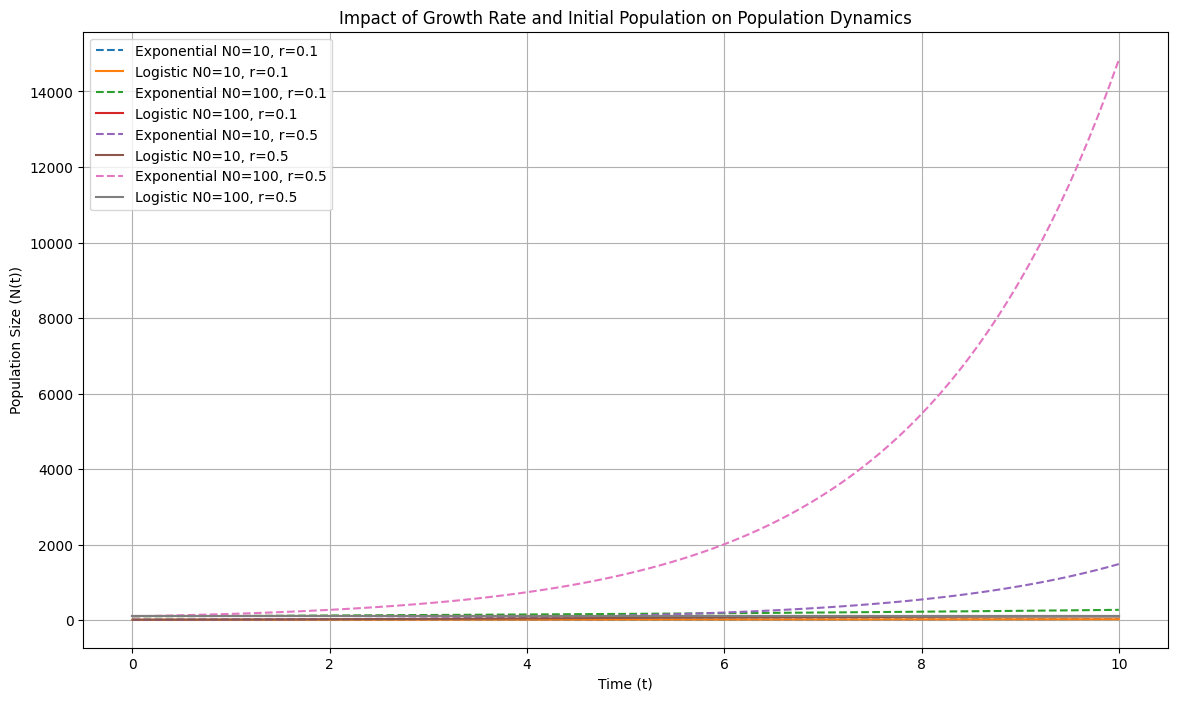

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_growth(N0, r, t):
    return N0 * np.exp(r * t)

def logistic_growth(N0, r, K, t):
    return (K * N0 * np.exp(r * t)) / (K + N0 * (np.exp(r * t) - 1))

# Time range and carrying capacity K for logistic growth
t = np.linspace(0, 10, 100)
K = 100  # Carrying capacity

# Scenarios with different r and N0
scenarios = [
    {'N0': 10, 'r': 0.1, 'label': 'N0=10, r=0.1'},
    {'N0': 100, 'r': 0.1, 'label': 'N0=100, r=0.1'},
    {'N0': 10, 'r': 0.5, 'label': 'N0=10, r=0.5'},
    {'N0': 100, 'r': 0.5, 'label': 'N0=100, r=0.5'}
]

# Plotting
plt.figure(figsize=(14, 8))

for scenario in scenarios:
    exp_growth = exponential_growth(scenario['N0'], scenario['r'], t)
    log_growth = logistic_growth(scenario['N0'], scenario['r'], K, t)
    
    plt.plot(t, exp_growth, '--', label=f'Exponential {scenario["label"]}')
    plt.plot(t, log_growth, '-', label=f'Logistic {scenario["label"]}')

plt.title('Impact of Growth Rate and Initial Population on Population Dynamics')
plt.xlabel('Time (t)')
plt.ylabel('Population Size (N(t))')
plt.legend()
plt.grid(True)
plt.show()


Cambios en la exponencial con R > 0 y R < 0

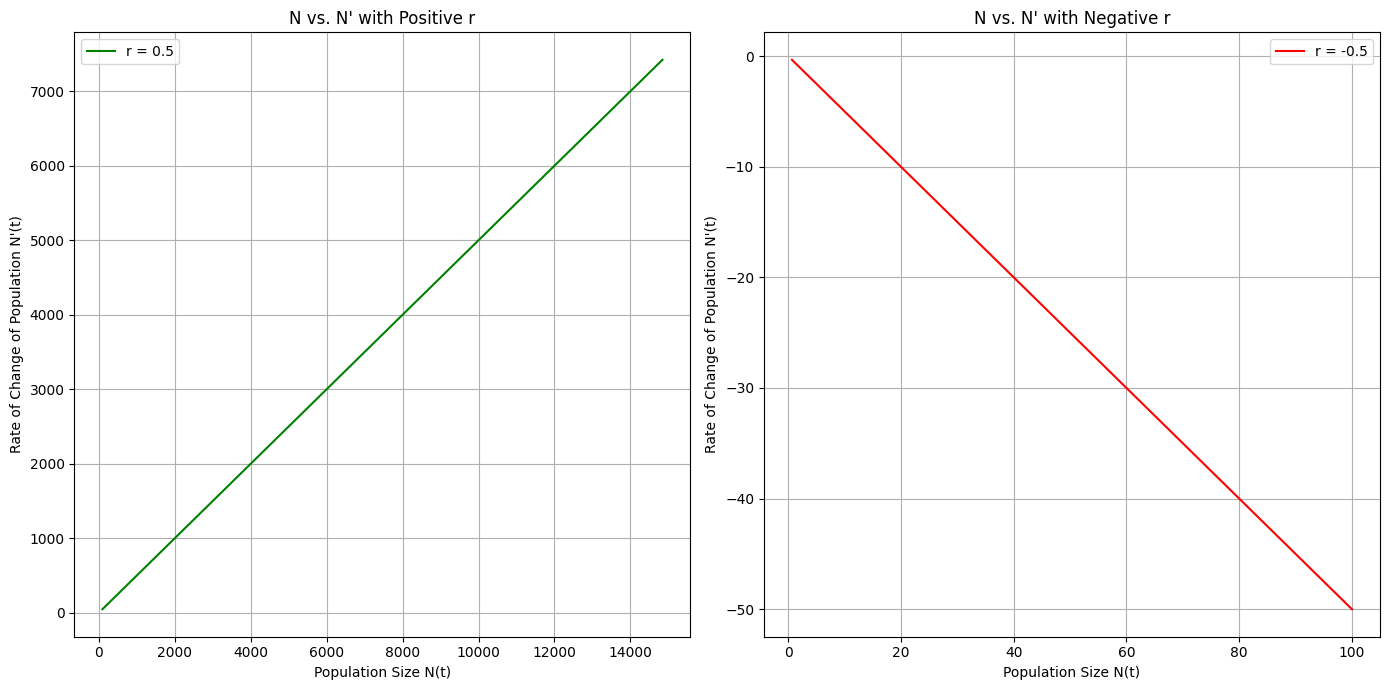

In [3]:
def exponential_growth_derivative(N0, r, t):
    return r * N0 * np.exp(r * t)

# Time range for visualization
t = np.linspace(-10, 10, 100)

# Parameters for scenarios
r_positive = 0.5
r_negative = -0.5
N0 = 100

# Calculate N and N' for positive r
N_positive = exponential_growth(N0, r_positive, t)
N_prime_positive = exponential_growth_derivative(N0, r_positive, t)

# Calculate N and N' for negative r
N_negative = exponential_growth(N0, r_negative, t)
N_prime_negative = exponential_growth_derivative(N0, r_negative, t)

# Plotting N vs N'
plt.figure(figsize=(14, 7))

# Plot for positive r
plt.subplot(1, 2, 1)
plt.plot(N_positive, N_prime_positive, 'g-', label=f'r = {r_positive}')
plt.title('N vs. N\' with Positive r')
plt.xlabel('Population Size N(t)')
plt.ylabel("Rate of Change of Population N'(t)")
plt.grid(True)
plt.legend()

# Plot for negative r
plt.subplot(1, 2, 2)
plt.plot(N_negative, N_prime_negative, 'r-', label=f'r = {r_negative}')
plt.title('N vs. N\' with Negative r')
plt.xlabel('Population Size N(t)')
plt.ylabel("Rate of Change of Population N'(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()